In [140]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline
%config InlineBackend.figure_format='retina'

In [124]:
df = pd.read_csv("MIx.csv")
df

,region,Country,avg unlicensed loss per year (in million USD),avg disposible income per year (in million USD)
0,AP,China,8292.00,"5,311,550.54"
1,AP,India,2749.75,"1,209,014.89"
2,AP,Japan,1300.00,"2,246,537.51"
3,AP,Indonesia,1292.50,"436,347.99"
4,AP,Thailand,793.25,"209,506.63"
...,...,...,...,...
82,WE,Denmark,197.25,"136,137.80"
83,WE,Finland,188.75,"126,429.64"
84,WE,Portugal,176.75,"133,555.91"
85,WE,Austria,162.75,"212,718.36"


In [156]:
# Fix the NaN Problem
df.replace({np.nan: "NA"}, inplace=True)

In [143]:
# Nothing here
df2 = df.iloc[:, [0,1,2,3]]
df2.head(5)
# df.info()

,region,Country,avg unlicensed loss per year (in million USD),avg disposible income per year (in million USD)
0,AP,China,8292.00,"5,311,550.54"
1,AP,India,2749.75,"1,209,014.89"
2,AP,Japan,1300.00,"2,246,537.51"
3,AP,Indonesia,1292.50,"436,347.99"
4,AP,Thailand,793.25,"209,506.63"


In [144]:
# Change Column name & datatype
df2.rename(columns={"avg unlicensed loss per year (in million USD)":"Lost", 
                   "avg disposible income per year (in million USD)":"Income",
                   "region":"Region"}, inplace=True)
df2["Income"].replace({",":"","-":0}, regex=True, inplace=True)
df2["Income"] = df2["Income"].astype("float")
df2.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Region   87 non-null     object 
 1   Country  87 non-null     object 
 2   Lost     87 non-null     float64
 3   Income   87 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.8+ KB


In [145]:
# Check if NA appears
df2.groupby(["Region"]).groups

{'AP': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'CEE': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], 'LA': [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'MEA': [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68], 'NA': [69, 70], 'WE': [71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]}

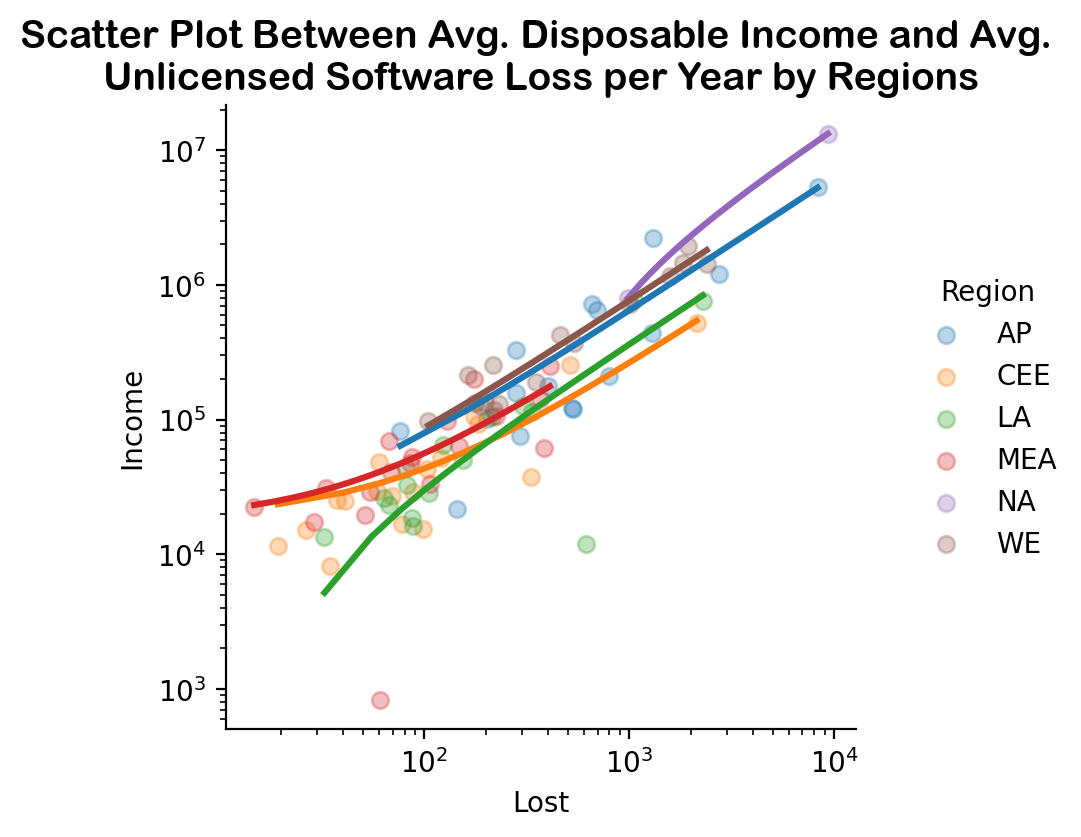

In [237]:
# Scatter Plot show correlation
grid = sns.lmplot(x="Lost", y="Income", data=df2, hue="Region", height=4, aspect=1,
           scatter_kws={'alpha':.3}, ci=False)
grid.set(xscale="log", yscale="log")
plt.title("Scatter Plot Between Avg. Disposable Income and Avg. \nUnlicensed Software Loss per Year by Regions",
          fontsize=14, fontname='Arial Rounded MT Bold');

In [164]:
# Exclude NA and China
df3 = df2[df2["Region"] != "NA"][df2["Country"] != "China"]
df3.head();

C:\Users\User\AppData\Local\Temp\ipykernel_2692\2160765397.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[df2["Region"] != "NA"][df2["Country"] != "China"]


,Region,Country,Lost,Income
1,AP,India,2749.75,1209014.89
2,AP,Japan,1300.00,2246537.51
3,AP,Indonesia,1292.50,436347.99
4,AP,Thailand,793.25,209506.63
5,AP,South Korea,695.50,646052.59


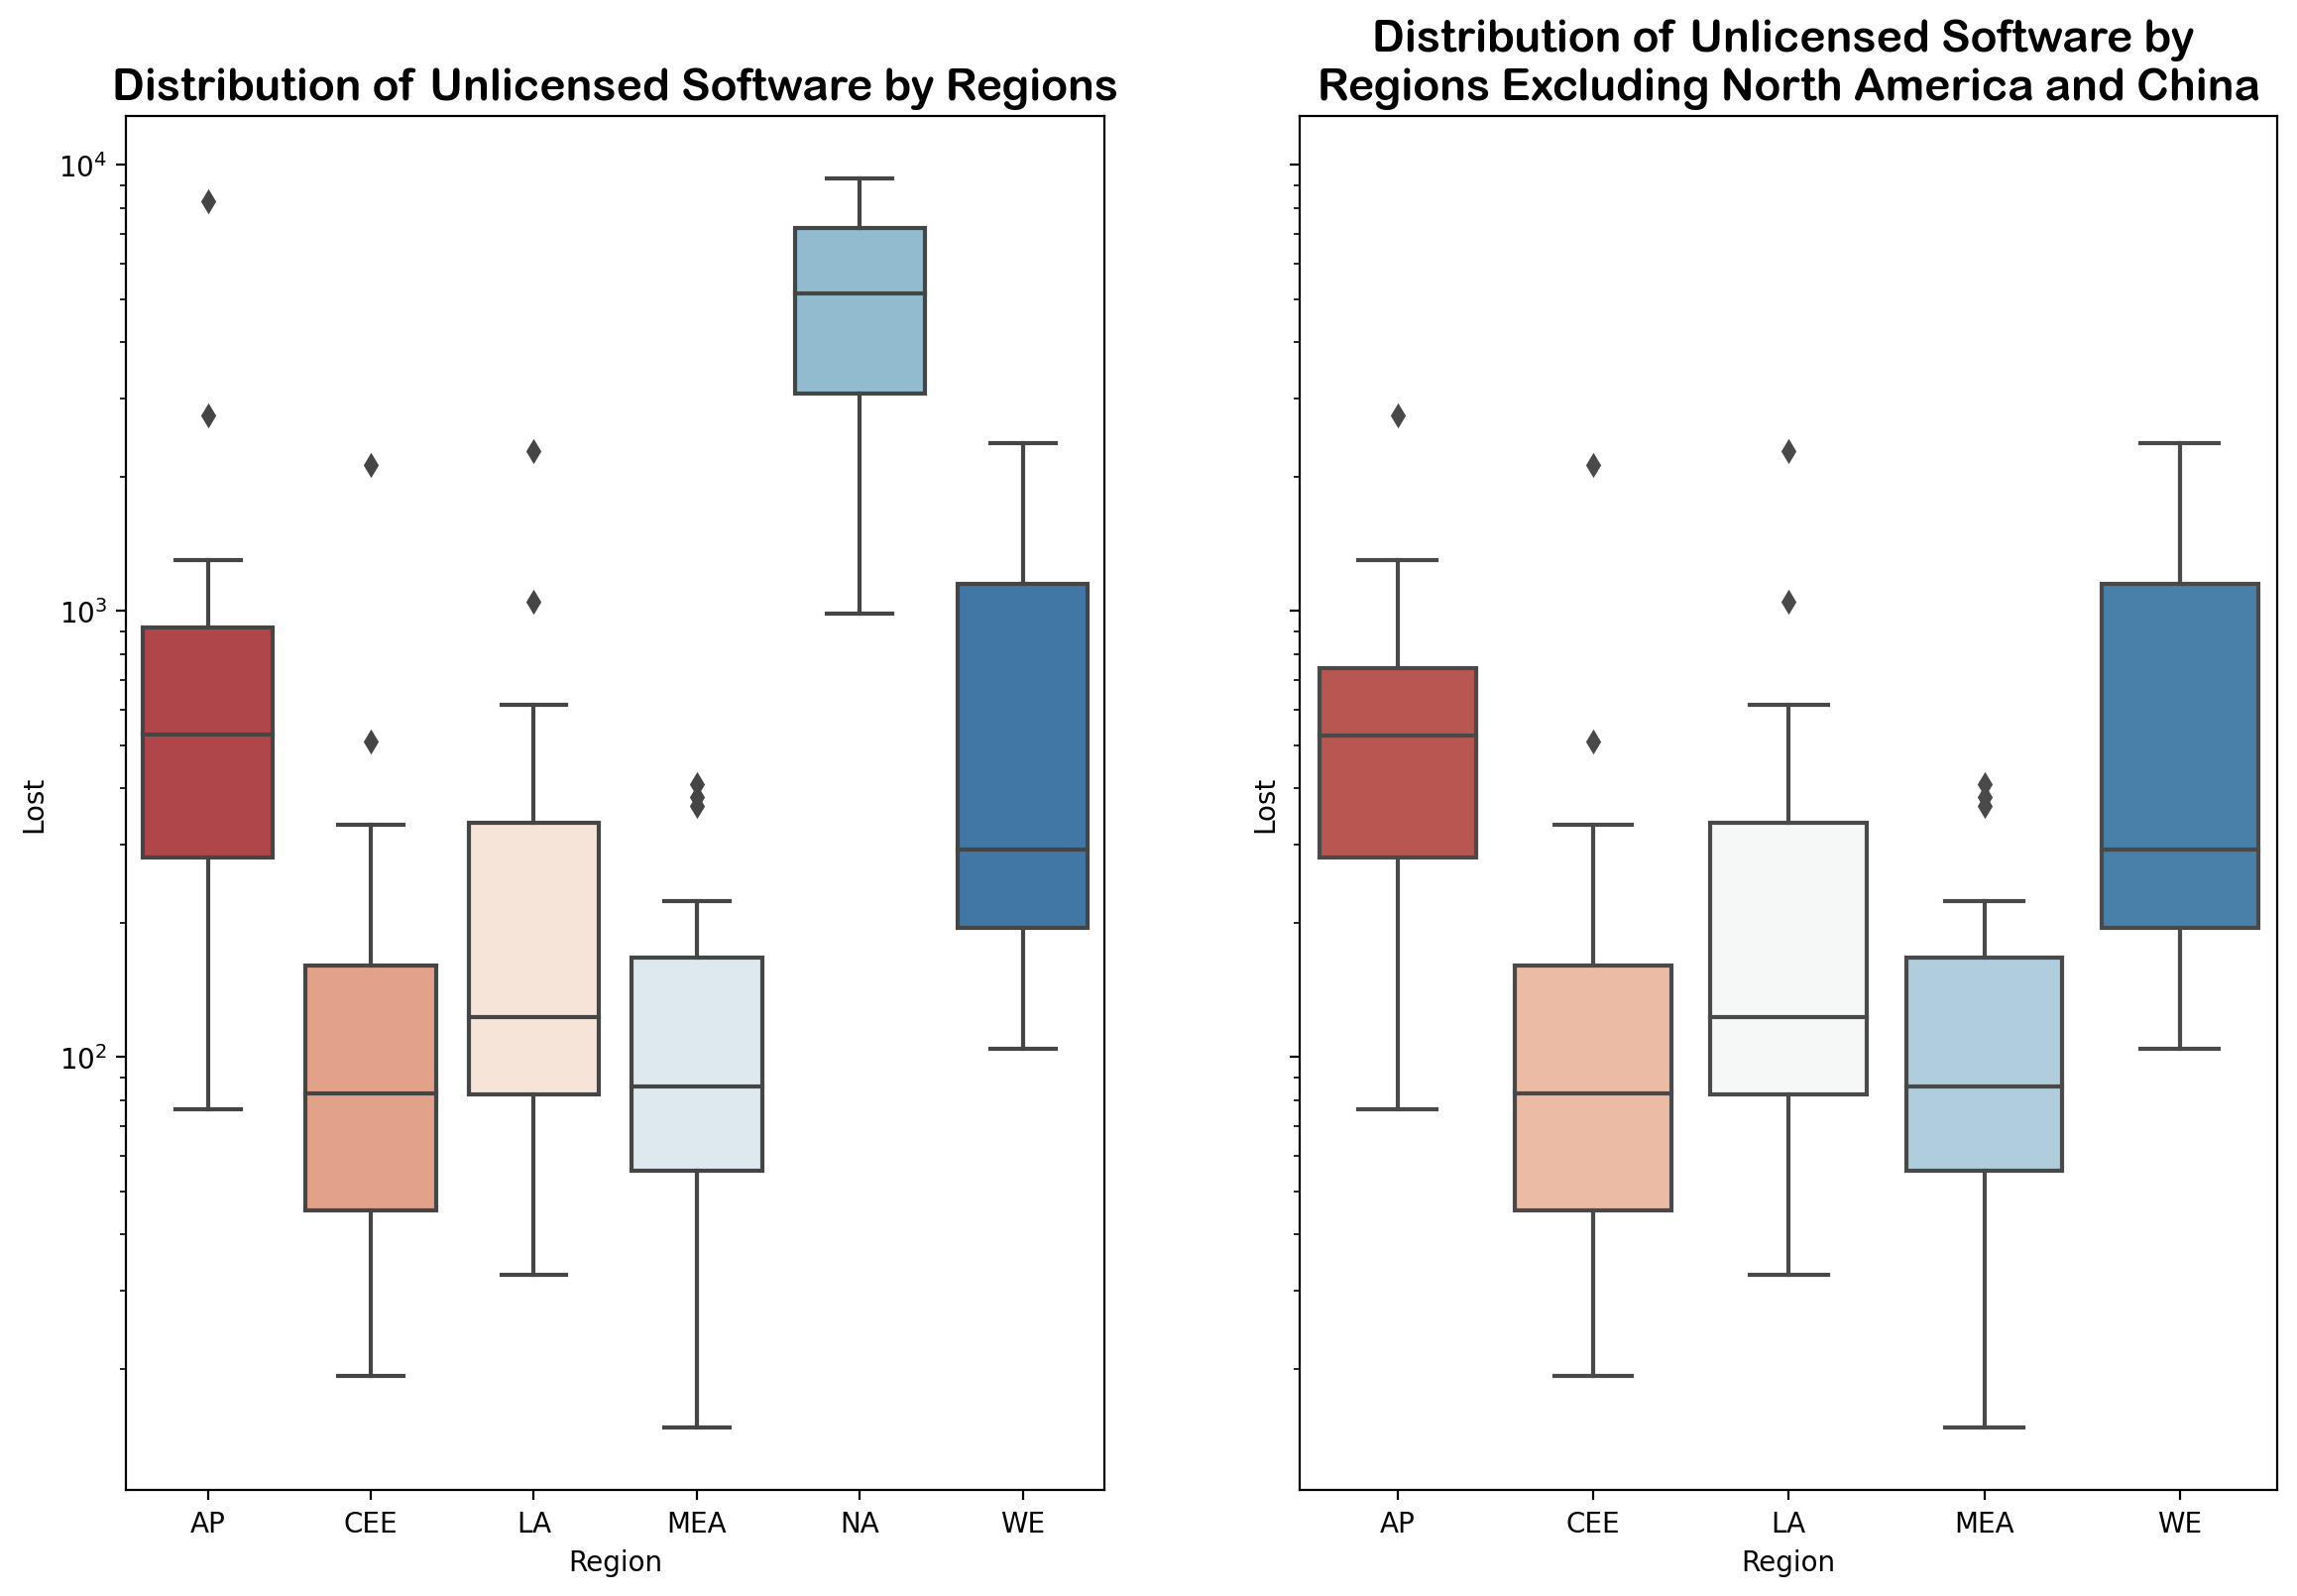

In [235]:
# Box plot show outliner
fig, ax = plt.subplots(1, 2, figsize=(14,9), sharey=True)
x_axis, y_axis = "Region", "Lost"

grid2 = sns.boxplot(x=x_axis, y=y_axis, data=df2, ax=ax[0], palette="RdBu")
grid2.set(yscale="log")
ax[0].set_title("Distribution of Unlicensed Software by Regions", 
                fontsize=16, fontname='Arial Rounded MT Bold')

grid3 = sns.boxplot(x=x_axis, y=y_axis, data=df3, ax=ax[1], palette="RdBu")
ax[1].set_title("Distribution of Unlicensed Software by \nRegions Excluding North America and China", 
                fontsize=16, fontname='Arial Rounded MT Bold');

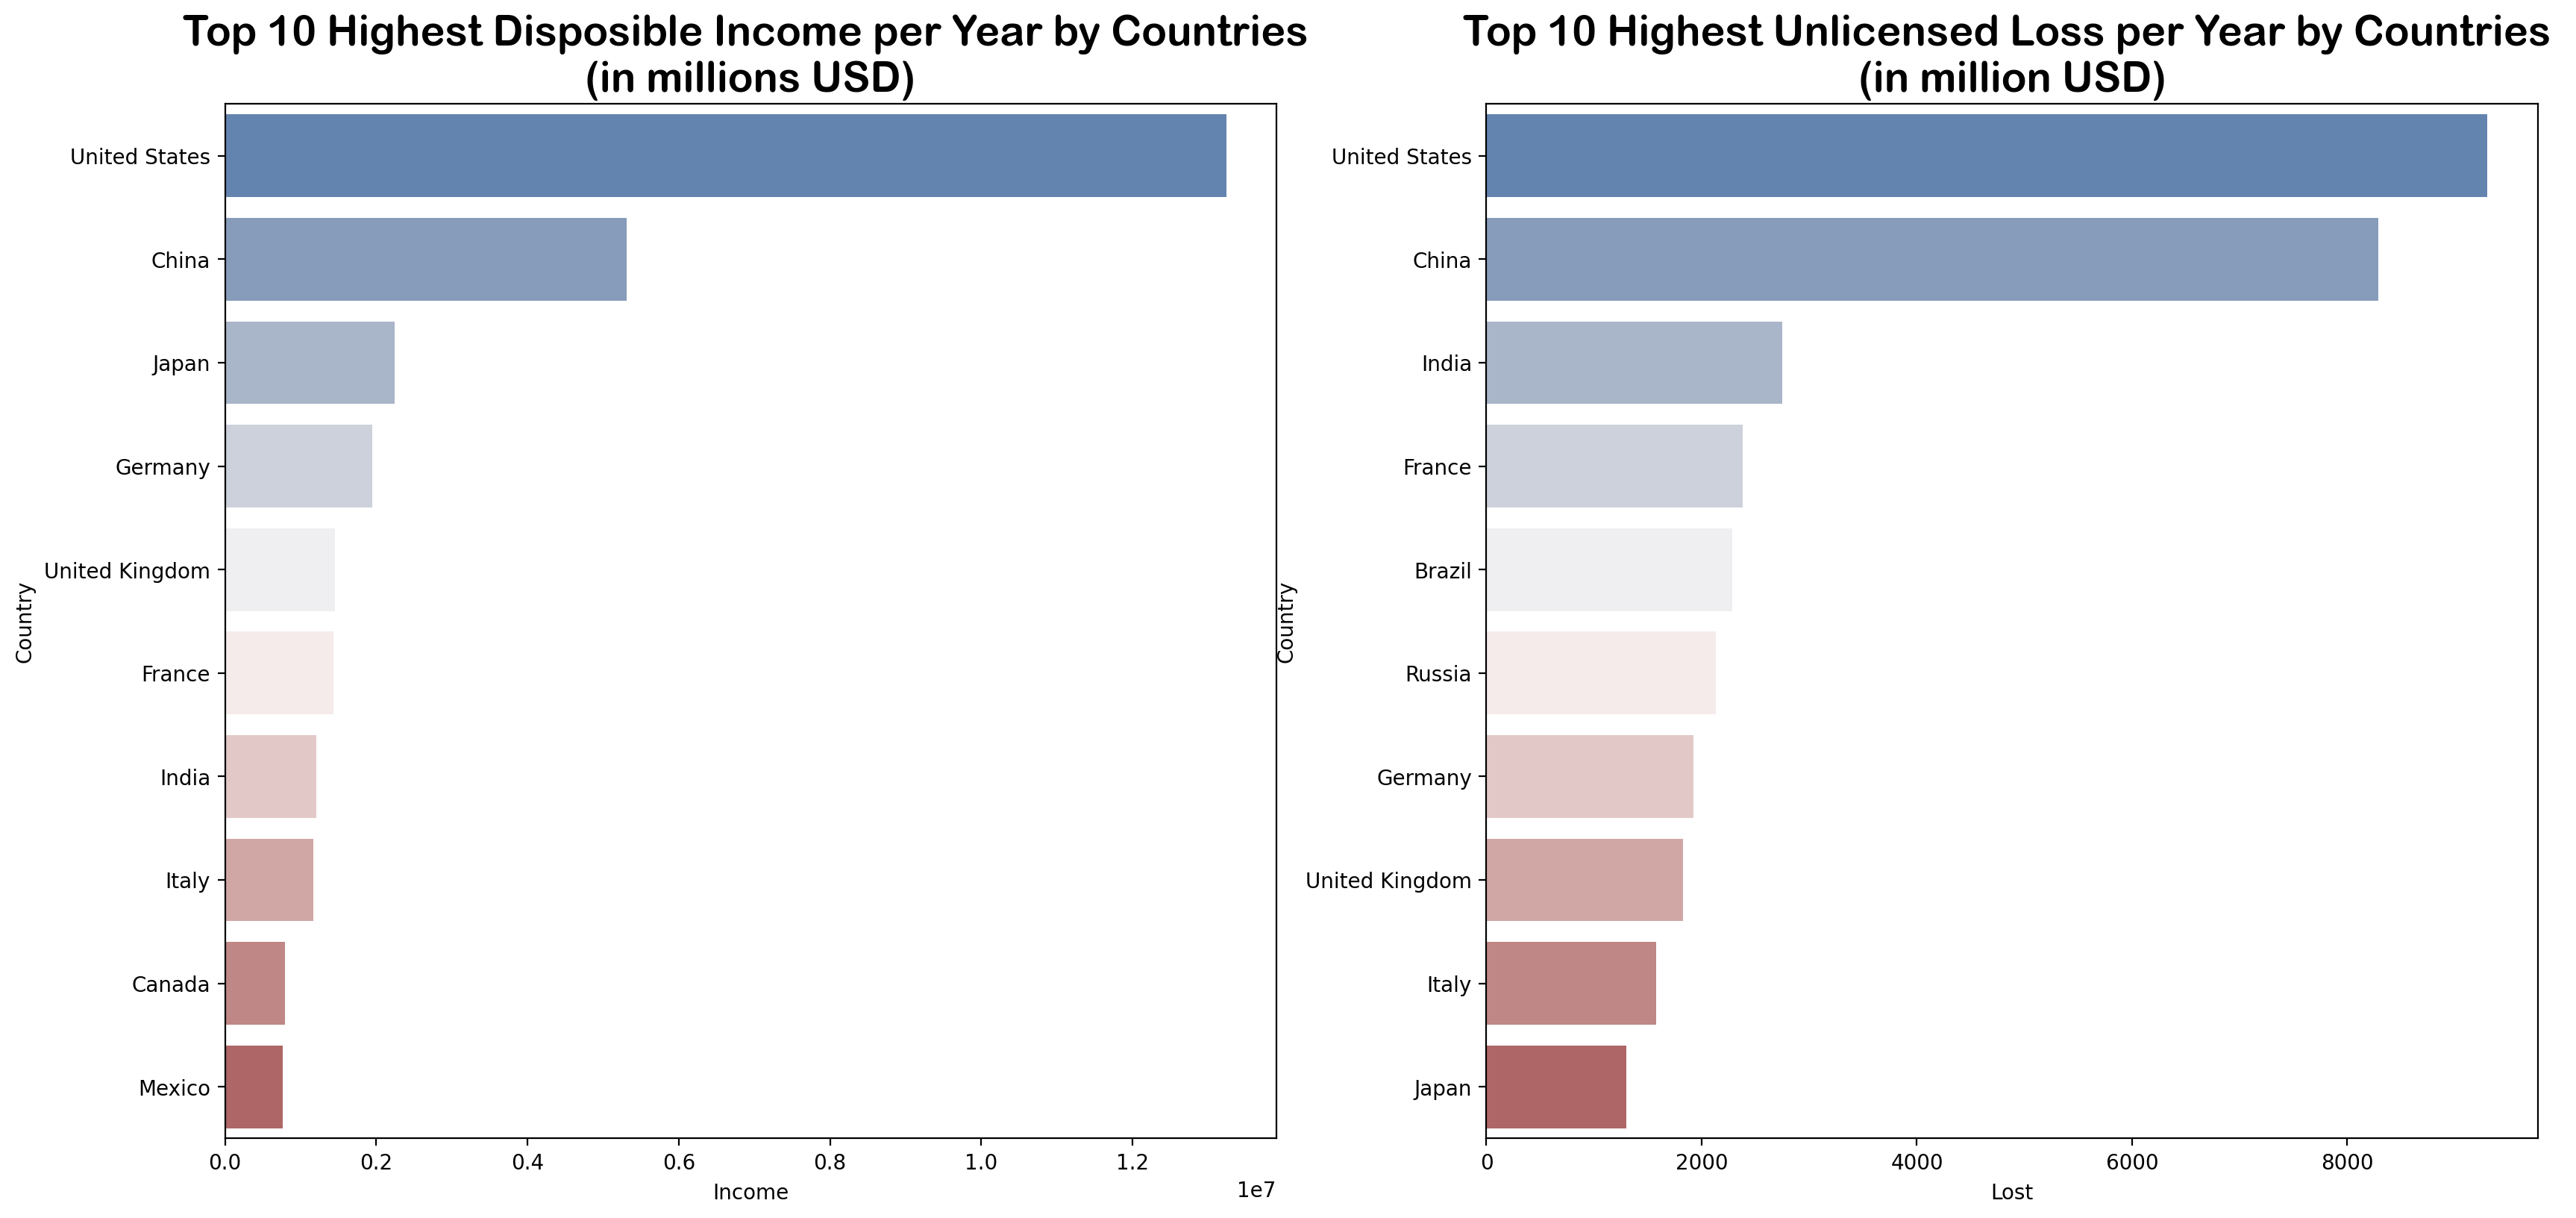

In [234]:
# Highest income & Lost by country
fig, ax = plt.subplots(1, 2, figsize=(20,9))
y_axis = "Country"

grid2 = sns.barplot(x="Income", y=y_axis, data=df2.sort_values("Income", ascending=False).head(10), ax=ax[0], palette="vlag")
ax[0].set_title("Top 10 Highest Disposible Income per Year by Countries \n(in millions USD)",
                fontsize=20, fontname='Arial Rounded MT Bold')

grid3 = sns.barplot(x="Lost", y=y_axis, data=df2.sort_values("Lost", ascending=False).head(10), ax=ax[1], palette="vlag")
ax[1].set_title("Top 10 Highest Unlicensed Loss per Year by Countries \n(in million USD)",
                fontsize=20, fontname='Arial Rounded MT Bold');

C:\Users\User\AppData\Local\Temp\ipykernel_2692\3390228195.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grid2 = sns.barplot(x=x_axis, y="Income", data=df2.sort_values("Income",
C:\Users\User\AppData\Local\Temp\ipykernel_2692\3390228195.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grid3 = sns.barplot(x=x_axis, y="Lost", data=df2.sort_values("Income",


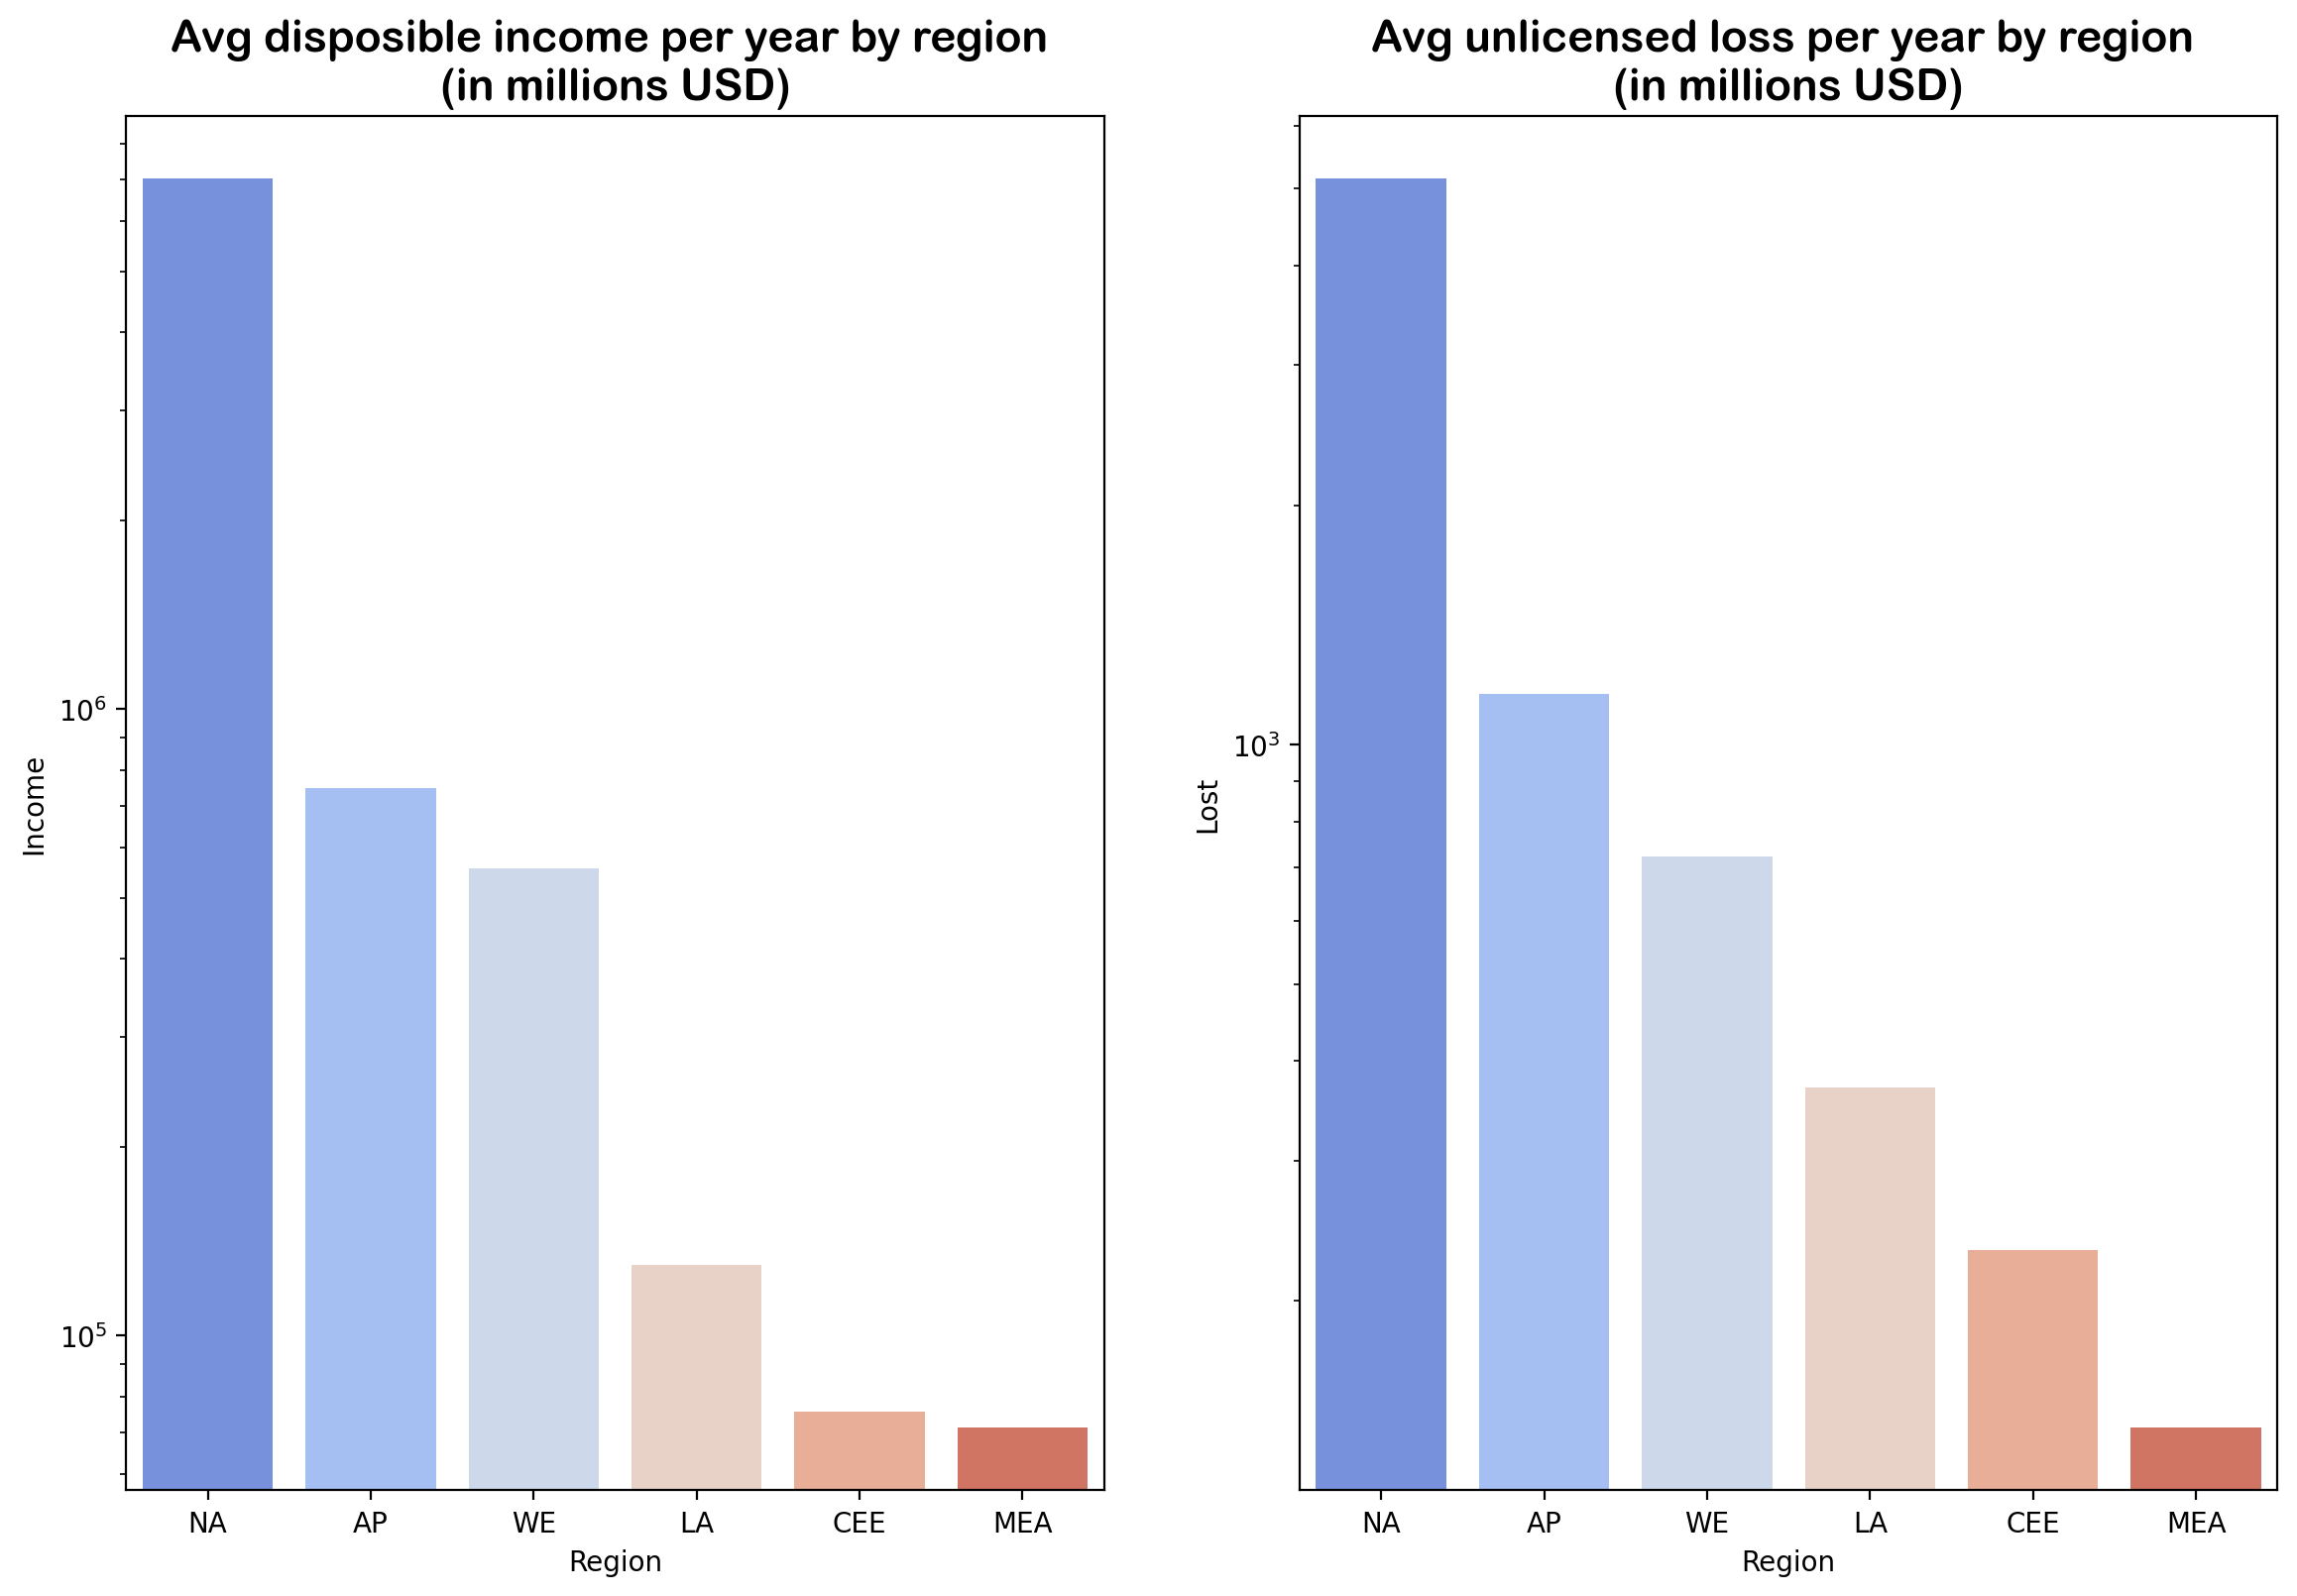

In [233]:
# Highest income & Lost by region
fig, ax = plt.subplots(1, 2, figsize=(14,9))
x_axis = "Region"

grid2 = sns.barplot(x=x_axis, y="Income", data=df2.sort_values("Income", 
        ascending=False), ax=ax[0], ci=None, palette="coolwarm")
ax[0].set_title("Avg disposible income per year by region \n(in millions USD)",
                fontsize=16, fontname='Arial Rounded MT Bold')

grid3 = sns.barplot(x=x_axis, y="Lost", data=df2.sort_values("Income",
        ascending=False), ax=ax[1], ci=None, palette="coolwarm")
ax[1].set_title("Avg unlicensed loss per year by region \n(in millions USD)",
                fontsize=16, fontname='Arial Rounded MT Bold')
grid2.set(yscale="log")
grid3.set(yscale="log");

In [ ]:
# Scatter 2 years compared
fig, ax = plt.subplots(1, 2, figsize=(14,9))
x_axis = "Region"

grid2 = sns.lmplot(x="Lost", y="Income", data=df2, hue="Region", height=4, aspect=1,
        scatter_kws={'alpha':.3}, ci=False)
ax[0].set_title("Avg disposible income per year by region (in millions USD)")

grid3 = sns.barplot(x=x_axis, y="Lost", data=df2.sort_values("Income", ascending=False), ax=ax[1])
ax[1].set_title("Avg unlicensed loss per year by region (in millions USD)")
grid2.set(yscale="log")
grid3.set(yscale="log");